In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

import yt
import numpy as np

In [2]:
def LocateStar(data):
    ds = yt.load(data,unit_base = unit_base) 
    MassStar = ad["PartType5", "Masses"].in_units('Msun')
    ParticleID = ad['PartType5', 'ParticleIDs']
    Coordinates = ad['PartType5', 'Coordinates'].in_units('pc')
    sort = np.argmax(MassStar)
    Center = Coordinates[sort]
    return Center

yt : [INFO     ] 2024-04-28 11:12:21,662 ComovingIntegrationOn != 1 or (not found and OmegaLambda is 0.0), so we are turning off Cosmology.
yt : [INFO     ] 2024-04-28 11:12:21,682 Parameters: current_time              = 0.0002463474080710203
yt : [INFO     ] 2024-04-28 11:12:21,682 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-04-28 11:12:21,683 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-04-28 11:12:21,683 Parameters: domain_right_edge         = [8.16 8.16 8.16]
yt : [INFO     ] 2024-04-28 11:12:21,683 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-04-28 11:12:21,705 Allocating for 1.084e+07 particles
Loading particle index: 100%|█████████████████| 42/42 [00:00<00:00, 2989.53it/s]
yt : [INFO     ] 2024-04-28 11:12:22,021 xlim = 3.598877 4.598877
yt : [INFO     ] 2024-04-28 11:12:22,022 ylim = 3.475362 4.475362
yt : [INFO     ] 2024-04-28 11:12:22,023 xlim = 3.598877 4.598877
yt : [INFO     ] 2024-04-28 11:12:22,023

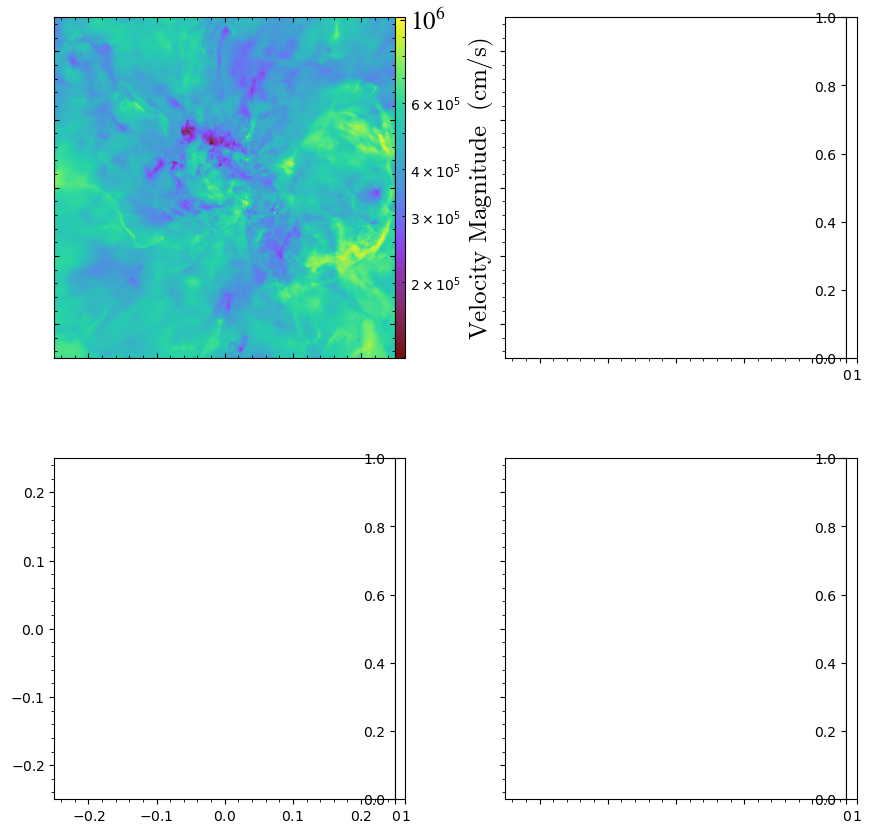

In [6]:


unit_base = {
    "length": (1.0, "pc"),
    "velocity": (100, "cm/s"),
    "mass": (1.0, "Msun"),
}
ds = yt.load("../data/snapshot_296.hdf5", unit_base=unit_base)


fig = plt.figure()

ad = ds.all_data()
MassStar = ad["PartType5", "Masses"].in_units('Msun')
ParticleID = ad['PartType5', 'ParticleIDs']
Coordinates = ad['PartType5', 'Coordinates'].in_units('pc')
sort = np.argmax(MassStar)
Center = Coordinates[sort]
# See http://matplotlib.org/mpl_toolkits/axes_grid/api/axes_grid_api.html
# These choices of keyword arguments produce a four panel plot that includes
# four narrow colorbars, one for each plot.  Axes labels are only drawn on the
# bottom left hand plot to avoid repeating information and make the plot less
# cluttered.
grid = AxesGrid(
    fig,
    (0.075, 0.075, 0.85, 0.85),
    nrows_ncols=(2, 2),
    axes_pad=1.0,
    label_mode="1",
    share_all=True,
    cbar_location="right",
    cbar_mode="each",
    cbar_size="3%",
    cbar_pad="0%",
)

fields = [
    ("gas", "velocity_magnitude"),
]

# Create the plot.  Since SlicePlot accepts a list of fields, we need only
# do this once.
p = yt.ProjectionPlot(ds, "z", fields, width=(1, "pc"), center = Center, weight_field=('gas', 'density') )

# Velocity is going to be both positive and negative, so let's make these
# slices use a linear colorbar scale
#p.set_log(("gas", "velocity_x"), False)
#p.set_log(("gas", "velocity_y"), False)

p.zoom(2)

# For each plotted field, force the SlicePlot to redraw itself onto the AxesGrid
# axes.
for i, field in enumerate(fields):
    plot = p.plots[field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]

# Finally, redraw the plot on the AxesGrid axes.
p.render()

plt.savefig("multiplot_2x2 velocity.png")